<a href="https://colab.research.google.com/github/MMaxG/Image-Detection/blob/main/AI_Exercise6_CNN_Max_Gr%C3%B6nlund.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#So we can install the data from MNIST
!pip install python-mnist

In [ ]:
import numpy as np
import random

from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

In [ ]:
# Importing data from mnist
(X_train, y_train), (X_test, y_test)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Visualization of data shapes currently
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of X_test: ", y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of X_test:  (10000,)


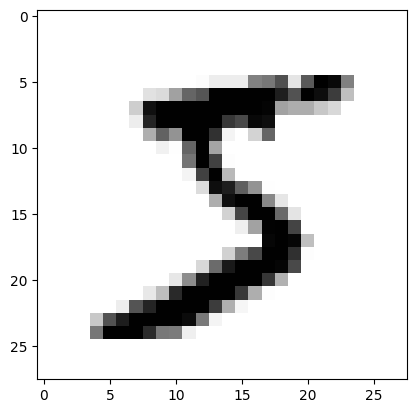

This is labeled as a:  5


In [ ]:
# Visualization of a single set of training data
image = X_train[0]
plt.imshow(image, cmap=plt.cm.binary)
plt.show()
print("This is labeled as a: ", y_train[0])

In [ ]:
# Normaliziation of data to between 0 and 1 and reshaping it, so that the 28x28 picture can be given to the network as a single value
X_train = X_train.reshape((60000, 28*28))
X_train = X_train.astype('float32')/255
X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype('float32')/255

In [ ]:
network = models.Sequential()
# Input layer
network.add(layers.Dense(512, activation = "relu", input_shape = (28*28,)))
# Output layer with 10 possible outcomes (0-9)
network.add(layers.Dense(10, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
network.compile(optimizer="adam", loss="categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
# Training the network
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#Even 1 epoch would be fine to get high accuracy, using batches of 128 pictures to more effectively train the network
network.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8742 - loss: 0.4503
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9657 - loss: 0.1191
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9797 - loss: 0.0715
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9853 - loss: 0.0489
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9905 - loss: 0.0345


In [ ]:
# How accurate is the network?:
test_loss, test_acc = network.evaluate(X_test, y_test)
print("Test accuracy: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0771
Test accuracy:  0.9782000184059143


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction: 4 . 
What is actually is: 4


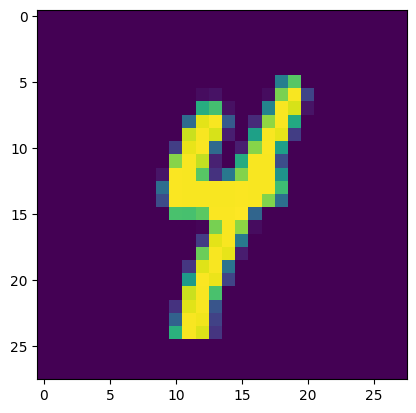

In [ ]:
# Demo for Predicting Individual Images
# Click for a random prediction
index = random.randint(0, len(y_test))
pred = network.predict(X_test[np.newaxis, index])
# Choose the highest value (argumentative maxima) from our output layer, AKA the number were most confident in it being
prediction = pred.argmax(axis=1)
img = (X_test[index]*255).reshape((28,28)).astype('uint8')

print("Prediction:", prediction[0], ".", "\nWhat is actually is:", y_test[index].argmax())
plt.imshow(img)
plt.show()